# Project 2

## Joseph Naro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Part I: 1

### This data set was provided on Kaggle for the purpose of load forecasting the energy consumption of a regional grid. The data set contains data gathered over a three year period by a PJM, and energy transmitter. Electricity is hard to store. As a result, most electricity is produced as it is required. By forecasting the load required, companies can determine how to best fit the demand. For example, if they believe the load will be below the energy that their renewable power generation can produce, companies will not need to use things like fossil fuel powered plants.

## The data is from https://www.kaggle.com/robikscube/hourly-energy-consumption?select=pjm_hourly_est.csv

# Part I: 2

### The raw data set has 2 columns and 32,896 rows.

### One columns is the "Datetime" column that represents the date and time for every hour over a three year span. The other column, "PJM_Load_MW", represent the load of the system at that hour in MegaWatts.

### A plot of the data can be seen below. It is visibly seasonal and varied. This is likely a result of different levels of power consumption throughout the year and throughout the day respectively.

In [206]:
df = pd.read_csv('PJM_Load_hourly.csv', parse_dates=['Datetime'])
df

,Datetime,PJM_Load_MW
0,1998-12-31 01:00:00,29309.0
1,1998-12-31 02:00:00,28236.0
2,1998-12-31 03:00:00,27692.0
3,1998-12-31 04:00:00,27596.0
4,1998-12-31 05:00:00,27888.0
...,...,...
32891,2001-01-01 20:00:00,35209.0
32892,2001-01-01 21:00:00,34791.0
32893,2001-01-01 22:00:00,33669.0
32894,2001-01-01 23:00:00,31809.0


In [4]:
df.describe()

,PJM_Load_MW
count,32896.000000
mean,29766.427408
std,5849.769954
min,17461.000000
25%,25473.000000
50%,29655.000000
75%,33073.250000
max,54030.000000


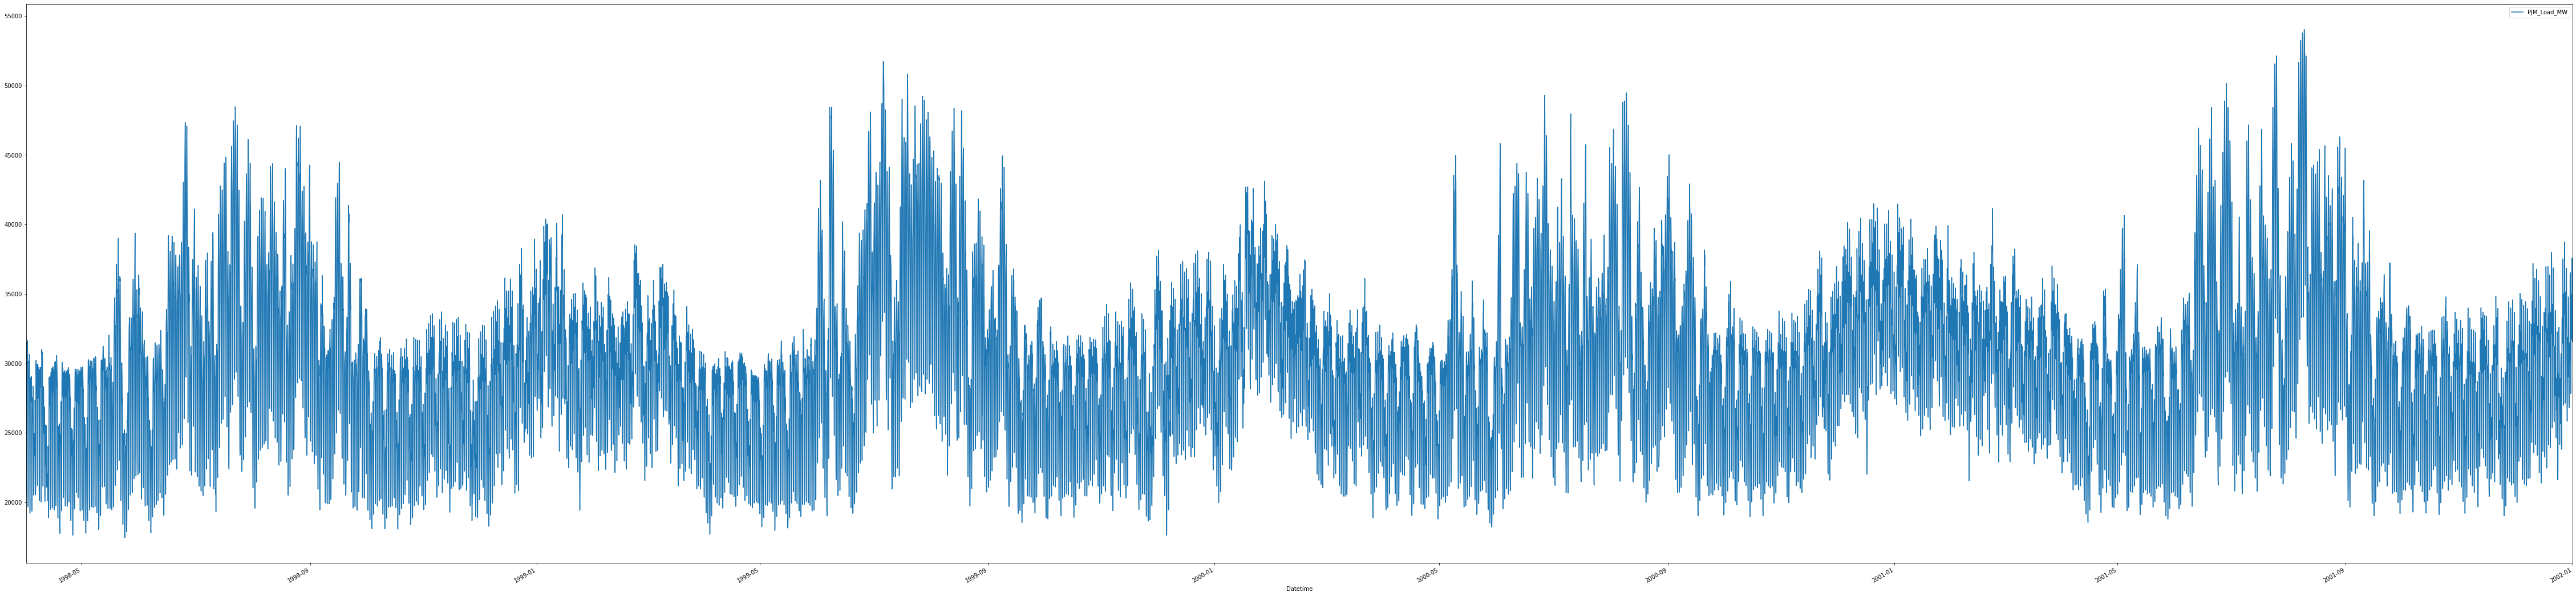

In [6]:
df.plot.line('Datetime', 'PJM_Load_MW', figsize=(80,20))

In [5]:
df.dtypes

Datetime       datetime64[ns]
PJM_Load_MW           float64
dtype: object

# Part I: 3

### The data requires almost no processing. I have decided to the rows to every fourth row. This was done to reduce the large training times.

In [93]:
df['PJM_Load_MW'].isnull().sum()

0

In [8]:
df = df.iloc[::4, :]

# Part II: 1

### For these tasks, the load on the system is the only value that matters.

In [9]:
series = df['PJM_Load_MW'].values
train_data_size = int(len(series) * .8)
test_data = series[int(len(series) * .8):]
len(test_data)

1645

In [46]:
train_data_size

6579

# Part II: 2

### I have chosen to use AR, ARMA, and ARIMA, because I wanted to see how they build off each other. Given more time, I would alos, like to experiment with SARIMAX.

In [100]:
start_time = time.time()

predictions = []
for i in range(len(test_data)):
    # TODO: try different order values
    ar_model = sm.tsa.AR(series[:(train_data_size+i)]).fit()
    predictions.append(ar_model.predict(start=train_data_size+i, end=train_data_size+i)[0])

ar_error = mean_squared_error(test_data, predictions)

ar_total_time = time.time() - start_time

## This is a grid search to find the optimal order parameter. Do not run it. It will take all day.

In [86]:
# start_time = time.time()
# best_error = 999999999999999
# optimal_order = ()
# test_size = 200
# arma_errors = []

In [87]:
#(5,5) wont work
#(5,4) takes hours to run
#(2,5) takes hours to run
#(3,4) takes hours to run
#(4,2) takes hours to run

# for AR in range(6):
#     for MA in range(6):
#         #these were removed because they exceeded the allowable time
#         if not ( (AR==5 and MA>3) or (AR==2 and MA==5) or (AR==3 and MA==4) or (AR==4 and (2<=MA<=4)) ):
#             try:
#                 predictions = []
#                 print(AR, MA)
#                 for i in range(test_size):
#                     print(i)
#                     arma_model = sm.tsa.ARMA(series[:(train_data_size+i)], order=(AR,MA)).fit()
#                     predictions.append(arma_model.forecast()[0][0])

#                 error = mean_squared_error(test_data[:test_size], predictions)
#                 print(error)    

#                 arma_errors.append(((AR,MA),error))

#                 if error < best_error:
#                     optimal_order = (AR,MA)
#                     best_error = error
#             except:
#                 pass

# arma_total_time = time.time() - start_time

0 0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102


C:\Users\joeyn\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
32176635.575233154
0 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174

C:\Users\joeyn\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
13943465.99471782
2 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
13117619.87042552
2 2
0
1
2
3
4
5
6
7
8
9


C:\Users\joeyn\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\joeyn\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
11840336.700161066
2 3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
1

C:\Users\joeyn\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198


C:\Users\joeyn\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


199
7028078.325737898
3 3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116


C:\Users\joeyn\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\joeyn\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
8514630.893168604
3 5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188


In [94]:
arma_optimal = (1,3)
start_time = time.time()


predictions = []
print(AR, MA)
for i in range(len(test_data)):
    arma_model = sm.tsa.ARMA(series[:(train_data_size+i)], order=(arma_optimal[0],arma_optimal[1])).fit()
    predictions.append(arma_model.forecast()[0][0])

arma_error = mean_squared_error(test_data, predictions)

arma_total_time = time.time() - start_time

5 5


## This is a grid search to find the optimal order parameter. Do not run it. It will take all day.

In [56]:
# arima_optimal = ()
# arima_best_error = 9999999999999999

# start_time = time.time()

# for AR in range(6):
#     for I in range(2):
#         for MA in range(6):
            
#             if AR>2 or I==1:
            
#                 try:

#                     last_tuple = (AR,I,MA)
#                     print(last_tuple)

#                     predictions = []
#                     test_size = 500
#                     for i in range(test_size):
#                         arima_model = sm.tsa.ARIMA(series[:(train_data_size+i)], order=(AR,I,MA)).fit()
#                         predictions.append(arima_model.forecast()[0][0])

#                     error = mean_squared_error(test_data[:test_size], predictions)

#                     if error < arima_best_error:
#                         arima_optimal = (AR,I,MA)
#                         arima_best_error = error

#                 except:
#                     pass

# arima_total_time = time.time() - start_time

5 1 5


In [104]:
start_time = time.time()
predictions = []

for i in range(len(test_data)):
    arima_model = sm.tsa.ARIMA(series[:(train_data_size+i)], order=(5,1,5)).fit()
    predictions.append(arima_model.forecast()[0][0])

arima_error = mean_squared_error(test_data, predictions)

arima_total_time = time.time() - start_time

In [109]:
arma_error

14334277.298977163

In [110]:
arma_total_time

4385.665314674377

In [ ]:
# ar_error = 2516306.699794692
# ar_total_time = 94.7745258808136
# arma_error = 14334277.298977163
# arma_total_time = 4385.665314674377
# arima_error = 3366293.215322345
# arima_total_time = 11444.468368053436

# Part II: 3

Text(0.5, 1.0, 'Execution Times')

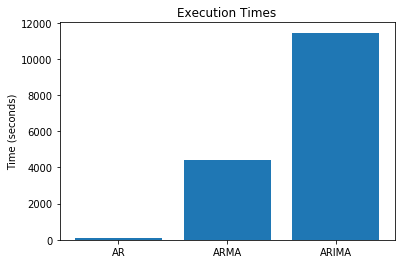

In [111]:
plt.bar(['AR', 'ARMA', 'ARIMA'], [ar_total_time, arma_total_time, arima_total_time])
plt.ylabel('Time (seconds)')
plt.title('Execution Times')

### The training time is about what I expected. Each method of analysis took longer to execute than the last, because each one built off the previous one. Something interesting to note is that it took ARIMA approximately 120 times longer than AR to run.

Text(0.5, 1.0, 'Error')

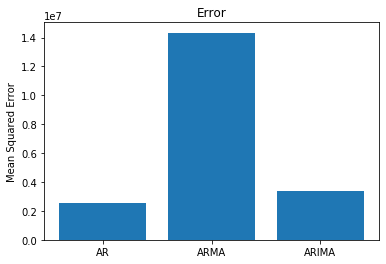

In [113]:
plt.bar(['AR', 'ARMA', 'ARIMA'], [ar_error, arma_error, arima_error])
plt.ylabel('Mean Squared Error')
plt.title('Error')

### I love this graph, because it shows a recurrent theme in artificial intelligence problems: the simple solution outperformed the more complex versions. AR had less errors, and was able to run in 1/120 the time. This likely reflects that the additional parameters caused over fitting.

# Part III: 1

In [129]:
from tensorflow.keras import Sequential, layers, optimizers
from sklearn.utils import shuffle

In [152]:
train_X = np.array([series[index:24+index] for index in range(train_data_size - 25)])
train_y = np.array([series[24+index] for index in range(train_data_size - 25)])
train_x, train_y = shuffle(train_X, train_y)
test_X = np.array([series[index:24+index] for index in range(train_data_size, train_data_size + len(test_data) - 25)])
test_y = np.array([series[24+index] for index in range(train_data_size, train_data_size + len(test_data) - 25)])

In [153]:
model_1 = Sequential()
model_1.add(layers.Dense(16, input_shape=(24,)))
model_1.add(layers.Dense(8))
model_1.add(layers.Dense(1))
model_1.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

In [154]:
model_1_history = model_1.fit(train_X, train_y, epochs=2_000, verbose=0)

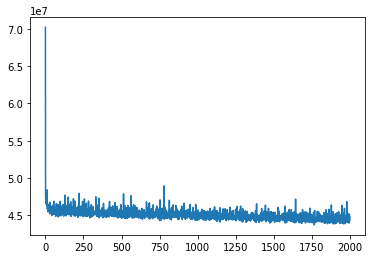

In [210]:
plt.plot(model_1_history.history['mse'])

In [157]:
predictions = model_1.predict(test_X, verbose=0)
predictions

array([[27786.443],
       [26639.98 ],
       [26782.521],
       ...,
       [33633.664],
       [33341.066],
       [33658.656]], dtype=float32)

In [158]:
model_1_error = mean_squared_error(test_y, predictions)
model_1_error

27705398.42468273

In [159]:
model_2 = Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(24,)))
model_2.add(layers.Dense(8))
model_2.add(layers.Dense(1))
model_2.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

In [160]:
model_2_history = model_2.fit(train_X, train_y, epochs=2_000, verbose=0)
predictions = model_2.predict(test_X, verbose=0)
predictions

array([[26759.338],
       [25594.729],
       [25692.81 ],
       ...,
       [32185.469],
       [31974.568],
       [32287.86 ]], dtype=float32)

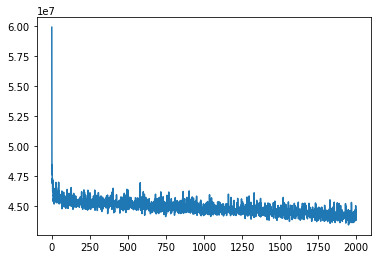

In [211]:
plt.plot(model_2_history.history['mse'])

In [161]:
model_2_error = mean_squared_error(test_y, predictions)
model_2_error

29652016.318190996

In [162]:
model_3 = Sequential()
model_3.add(layers.Dense(16, input_shape=(24,)))
model_3.add(layers.Dense(8, activation='relu'))
model_3.add(layers.Dense(1))
model_3.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

In [163]:
model_3_history = model_3.fit(train_X, train_y, epochs=2_000, verbose=0)
predictions = model_3.predict(test_X, verbose=0)
predictions

array([[27998.29 ],
       [26766.043],
       [26925.215],
       ...,
       [33879.566],
       [33663.793],
       [33997.188]], dtype=float32)

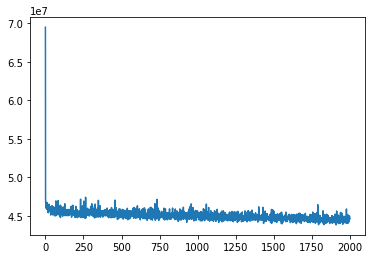

In [212]:
plt.plot(model_3_history.history['mse'])

In [164]:
model_3_error = mean_squared_error(test_y, predictions)
model_3_error

27151229.817041628

In [165]:
model_4 = Sequential()
model_4.add(layers.Dense(8, input_shape=(24,)))
model_4.add(layers.Dense(4))
model_4.add(layers.Dense(1))
model_4.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

In [166]:
model_4_history = model_4.fit(train_X, train_y, epochs=2_000, verbose=0)
predictions = model_4.predict(test_X, verbose=0)
predictions

array([[27072.828],
       [25936.729],
       [26106.717],
       ...,
       [32754.95 ],
       [32391.465],
       [32649.13 ]], dtype=float32)

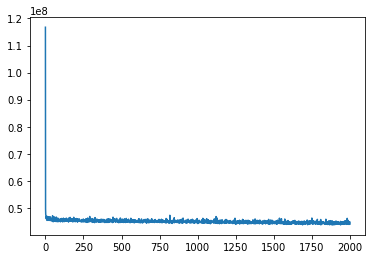

In [213]:
plt.plot(model_4_history.history['mse'])

In [167]:
model_4_error = mean_squared_error(test_y, predictions)
model_4_error

29337221.35836162

In [168]:
model_5 = Sequential()
model_5.add(layers.Dense(16, input_shape=(24,)))
model_5.add(layers.Dense(1))
model_5.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

In [169]:
model_5_history = model_5.fit(train_X, train_y, epochs=2_000, verbose=0)
predictions = model_5.predict(test_X, verbose=0)
predictions

array([[26634.973],
       [25689.562],
       [25740.725],
       ...,
       [32681.803],
       [32546.44 ],
       [32539.045]], dtype=float32)

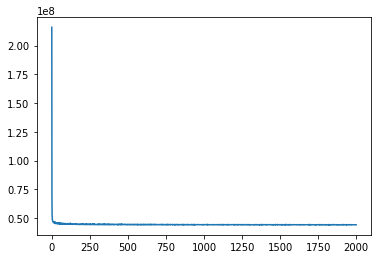

In [214]:
plt.plot(model_5_history.history['mse'])

In [170]:
model_5_error = mean_squared_error(test_y, predictions)
model_5_error

29228980.296394028

In [171]:
model_6 = Sequential()
model_6.add(layers.Dense(100, input_shape=(24,)))
model_6.add(layers.Dense(1))
model_6.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

In [172]:
model_6_history = model_6.fit(train_X, train_y, epochs=2_000, verbose=0)
predictions = model_6.predict(test_X, verbose=0)
predictions

array([[27273.03 ],
       [26308.605],
       [26468.56 ],
       ...,
       [33595.613],
       [33351.51 ],
       [33357.473]], dtype=float32)

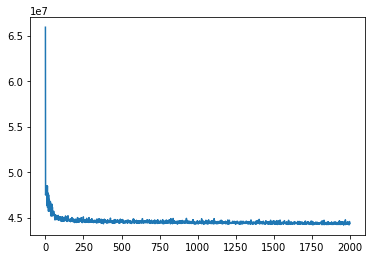

In [215]:
plt.plot(model_6_history.history['mse'])

In [173]:
model_6_error = mean_squared_error(test_y, predictions)
model_6_error

27974338.603575837

In [174]:
train_X_2 = np.array([series[index:128+index] for index in range(train_data_size - 129)])
train_y_2 = np.array([series[128+index] for index in range(train_data_size - 129)])
train_x_2, train_y_2 = shuffle(train_X_2, train_y_2)
test_X_2 = np.array([series[index:128+index] for index in range(train_data_size, train_data_size + len(test_data) - 129)])
test_y_2 = np.array([series[128+index] for index in range(train_data_size, train_data_size + len(test_data) - 129)])

In [178]:
model_7 = Sequential()
model_7.add(layers.Dense(100, input_shape=(128,)))
model_7.add(layers.Dense(1))
model_7.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

In [179]:
model_7_history = model_7.fit(train_X_2, train_y_2, epochs=2_000, verbose=0)
predictions = model_7.predict(test_X_2, verbose=0)
predictions

array([[27279.361],
       [27877.812],
       [28316.438],
       ...,
       [32054.5  ],
       [32088.215],
       [32287.752]], dtype=float32)

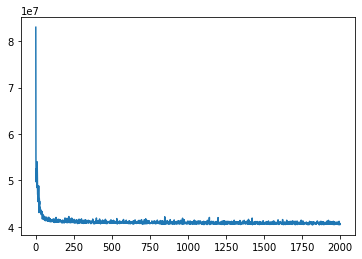

In [216]:
plt.plot(model_7_history.history['mse'])

In [180]:
model_7_error = mean_squared_error(test_y_2, predictions)
model_7_error

32899130.903008897

<BarContainer object of 7 artists>

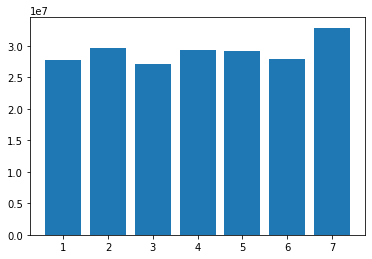

In [219]:
plt.bar(range(1,8),[model_1_error,model_2_error,model_3_error,model_4_error,model_5_error,model_6_error,model_7_error])

### As you can the loss tended to drop and immediately plateau around 4.5x10^7 for every model, this likely means that there needs to be a dramatic change to the architecture.

### You can see that they all had around the same loss, but model 7 definitely benefited from the larger input.

# Part III: 2

In [189]:
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [201]:
lstm_model = Sequential()
lstm_model.add(layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(24,1)))
lstm_model.add(layers.LSTM(64, activation='relu', return_sequences=True))
lstm_model.add(layers.Flatten())
lstm_model.add(layers.Dense(1))
lstm_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mse', 'accuracy'])
lstm_model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 24, 64)            16896     
_________________________________________________________________
lstm_19 (LSTM)               (None, 24, 64)            33024     
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 1537      
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


In [204]:
lstm_model_history = lstm_model.fit(train_X, train_y, epochs=200, verbose=1, validation_data=(test_X, test_y), shuffle=True)

Train on 6554 samples, validate on 1620 samples
Epoch 1/200
6554/6554 [==============================] - 15s 2ms/sample - loss: 46602046.7428 - mse: 46602056.0000 - accuracy: 0.0000e+00 - val_loss: 34517657.8864 - val_mse: 34517656.0000 - val_accuracy: 0.0000e+00
Epoch 2/200
6554/6554 [==============================] - 16s 2ms/sample - loss: 46112917.1071 - mse: 46112916.0000 - accuracy: 0.0000e+00 - val_loss: 37260606.5728 - val_mse: 37260608.0000 - val_accuracy: 0.0000e+00
Epoch 3/200
6554/6554 [==============================] - 16s 2ms/sample - loss: 46343615.5447 - mse: 46343628.0000 - accuracy: 0.0000e+00 - val_loss: 33374538.2272 - val_mse: 33374540.0000 - val_accuracy: 0.0000e+00
Epoch 4/200
6554/6554 [==============================] - 16s 3ms/sample - loss: 46656501.0705 - mse: 46656496.0000 - accuracy: 0.0000e+00 - val_loss: 33539139.5852 - val_mse: 33539148.0000 - val_accuracy: 0.0000e+00
Epoch 5/200
6554/6554 [==============================] - 15s 2ms/sample - loss: 46217546

6554/6554 [==============================] - 16s 2ms/sample - loss: 46032692.6286 - mse: 46032692.0000 - accuracy: 0.0000e+00 - val_loss: 34538366.1827 - val_mse: 34538368.0000 - val_accuracy: 0.0000e+00
Epoch 39/200
6554/6554 [==============================] - 28s 4ms/sample - loss: 45896775.0320 - mse: 45896772.0000 - accuracy: 0.0000e+00 - val_loss: 32540963.2049 - val_mse: 32540958.0000 - val_accuracy: 0.0000e+00
Epoch 40/200
6554/6554 [==============================] - 19s 3ms/sample - loss: 47201918.0690 - mse: 47201908.0000 - accuracy: 0.0000e+00 - val_loss: 34490545.3333 - val_mse: 34490544.0000 - val_accuracy: 0.0000e+00
Epoch 41/200
6554/6554 [==============================] - 19s 3ms/sample - loss: 45957839.1321 - mse: 45957844.0000 - accuracy: 0.0000e+00 - val_loss: 34639843.4963 - val_mse: 34639836.0000 - val_accuracy: 0.0000e+00
Epoch 42/200
6554/6554 [==============================] - 18s 3ms/sample - loss: 46609343.8108 - mse: 46609344.0000 - accuracy: 0.0000e+00 - val_

Epoch 76/200
6554/6554 [==============================] - 19s 3ms/sample - loss: 45481868.5212 - mse: 45481868.0000 - accuracy: 0.0000e+00 - val_loss: 32728169.6494 - val_mse: 32728166.0000 - val_accuracy: 0.0000e+00
Epoch 77/200
6554/6554 [==============================] - 15s 2ms/sample - loss: 45358389.3952 - mse: 45358376.0000 - accuracy: 0.0000e+00 - val_loss: 32018849.3877 - val_mse: 32018846.0000 - val_accuracy: 0.0000e+00
Epoch 78/200
6554/6554 [==============================] - 16s 2ms/sample - loss: 45075762.7440 - mse: 45075748.0000 - accuracy: 0.0000e+00 - val_loss: 30207654.3506 - val_mse: 30207652.0000 - val_accuracy: 0.0000e+00
Epoch 79/200
6554/6554 [==============================] - 17s 3ms/sample - loss: 45157417.8773 - mse: 45157412.0000 - accuracy: 0.0000e+00 - val_loss: 30419190.2222 - val_mse: 30419192.0000 - val_accuracy: 0.0000e+00
Epoch 80/200
6554/6554 [==============================] - 15s 2ms/sample - loss: 45181215.9878 - mse: 45181212.0000 - accuracy: 0.00

Epoch 114/200
6554/6554 [==============================] - 14s 2ms/sample - loss: 41802574.2447 - mse: 41802572.0000 - accuracy: 0.0000e+00 - val_loss: 30049691.8222 - val_mse: 30049688.0000 - val_accuracy: 0.0000e+00
Epoch 115/200
6554/6554 [==============================] - 14s 2ms/sample - loss: 41584974.6512 - mse: 41584972.0000 - accuracy: 0.0000e+00 - val_loss: 32316888.4494 - val_mse: 32316892.0000 - val_accuracy: 0.0000e+00
Epoch 116/200
6554/6554 [==============================] - 15s 2ms/sample - loss: 41842621.5111 - mse: 41842624.0000 - accuracy: 0.0000e+00 - val_loss: 29633853.0321 - val_mse: 29633850.0000 - val_accuracy: 0.0000e+00
Epoch 117/200
6554/6554 [==============================] - 15s 2ms/sample - loss: 41954804.3137 - mse: 41954808.0000 - accuracy: 0.0000e+00 - val_loss: 30850564.6815 - val_mse: 30850562.0000 - val_accuracy: 0.0000e+00
Epoch 118/200
6554/6554 [==============================] - 18s 3ms/sample - loss: 42846206.3595 - mse: 42846204.0000 - accuracy:

6554/6554 [==============================] - 16s 2ms/sample - loss: 40298550.9442 - mse: 40298556.0000 - accuracy: 0.0000e+00 - val_loss: 35397401.7531 - val_mse: 35397400.0000 - val_accuracy: 0.0000e+00
Epoch 152/200
6554/6554 [==============================] - 17s 3ms/sample - loss: 40065921.0485 - mse: 40065924.0000 - accuracy: 0.0000e+00 - val_loss: 36219086.4691 - val_mse: 36219084.0000 - val_accuracy: 0.0000e+00
Epoch 153/200
6554/6554 [==============================] - 14s 2ms/sample - loss: 40110031.8059 - mse: 40110036.0000 - accuracy: 0.0000e+00 - val_loss: 37168068.8444 - val_mse: 37168068.0000 - val_accuracy: 0.0000e+00
Epoch 154/200
6554/6554 [==============================] - 13s 2ms/sample - loss: 40393851.7766 - mse: 40393840.0000 - accuracy: 0.0000e+00 - val_loss: 31899126.8494 - val_mse: 31899128.0000 - val_accuracy: 0.0000e+00
Epoch 155/200
6554/6554 [==============================] - 13s 2ms/sample - loss: 40139593.4940 - mse: 40139592.0000 - accuracy: 0.0000e+00 - 

6554/6554 [==============================] - 15s 2ms/sample - loss: 39339812.1343 - mse: 39339808.0000 - accuracy: 0.0000e+00 - val_loss: 31769302.0346 - val_mse: 31769294.0000 - val_accuracy: 0.0000e+00
Epoch 189/200
6554/6554 [==============================] - 16s 2ms/sample - loss: 38856053.1340 - mse: 38856044.0000 - accuracy: 0.0000e+00 - val_loss: 45232889.0914 - val_mse: 45232892.0000 - val_accuracy: 0.0000e+00
Epoch 190/200
6554/6554 [==============================] - 15s 2ms/sample - loss: 39318126.5829 - mse: 39318124.0000 - accuracy: 0.0000e+00 - val_loss: 33626514.6963 - val_mse: 33626516.0000 - val_accuracy: 0.0000e+00
Epoch 191/200
6554/6554 [==============================] - 15s 2ms/sample - loss: 38790677.5990 - mse: 38790676.0000 - accuracy: 0.0000e+00 - val_loss: 35811823.1654 - val_mse: 35811824.0000 - val_accuracy: 0.0000e+00
Epoch 192/200
6554/6554 [==============================] - 15s 2ms/sample - loss: 38839851.4214 - mse: 38839856.0000 - accuracy: 0.0000e+00 - 

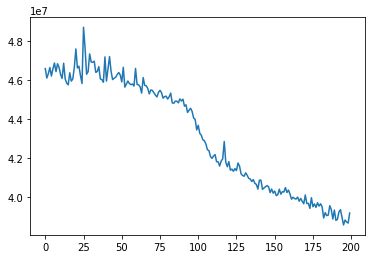

In [220]:
plt.plot(lstm_model_history.history['mse'])

### These results are the most promising yet, and the suggest that the LSTM model would get even better if allowed to train for a longer time, because there is no sign of a plateau yet.

# Part III: 3

### There is a clear benefit th using the LSTM, but its longer training time is a draw back. The simple yet effective results from AR remain the best, but I am confident that a LSTM could beat it judging by the outcomes of my trials thus far. It is worth noting that AR solved the problem almost instantly.